In [44]:
import matplotlib.pyplot as plt
import os
import subprocess

In [3]:

result_folder = "/home/ubuntu/autoscaler/vertical-pod-autoscaler/experiments/"

In [23]:
# cpu_half_life = 6h
version = "default"
experiment_type = "nginx"
version_folder = os.path.join(result_folder, experiment_type + "-" + version)
replicas = 2

throughput = [1535.17, 2084.68, 2020.77, 2218.64,]
rps = [1935,2086,2022,2221]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-default-20220412064322.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-default-20220412064322.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

In [24]:
r = 0
for i,j in zip(rps, throughput):
    r+= (i-j)/i
    print((i-j)/i)

r/4

0.2066304909560723
0.0006327900287632616
0.0006083086053412553
0.0010625844214318448


0.052233543502902165

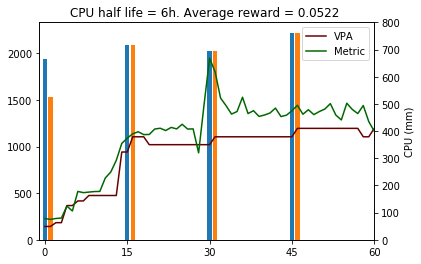

In [32]:
plt.bar(range(0,60,15), rps, label="RPS")
plt.bar(range(1,61,15), throughput, label="Throughput")

plt.xticks(range(0,61,15))
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,800)


plt.title("CPU half life = 6h. Average reward = 0.0522 ")
plt.legend()
plt.show()

In [33]:
# cpu_half_life = 15m
version = "15m"
experiment_type = "nginx"
version_folder = os.path.join(result_folder, experiment_type + "-" + version)
replicas = 2


throughput = [1587.15, 2224.67, 2246.68, 1998.77] 
rps = [2086,2226,2248,2001]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-15m-20220413035112.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-15m-20220413035112.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

In [34]:
r = 0
for i,j in zip(rps, throughput):
    r+= (i-j)/i
    print((i-j)/i)

r/4

0.23914189837008626
0.0005974842767295271
0.0005871886120997169
0.0011144427786107037


0.06036025350938155

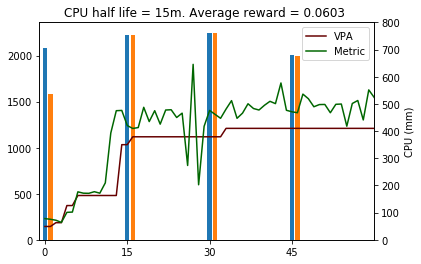

In [35]:
plt.bar(range(0,60,15), rps)
plt.bar(range(1,61,15), throughput)

plt.xticks(range(0,60,15))
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,800)

plt.legend()
plt.title("CPU half life = 15m. Average reward = 0.0603 ")
plt.show()

In [30]:
# cpu_half_life = 6h
version = "default-bursty"
experiment_type = "nginx"
version_folder = os.path.join(result_folder, experiment_type + "-" + version)
replicas = 2


throughput = [ 1459.21, 9855.85, 2041.76, 16844.27, 2116.72, 16991.43, 2079.90] 
rps = [1890,20002,2042,20024,2118,19986,2080]
duration = [13,2,13,2,15,2,13]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-default-bursty-20220413015941.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-default-bursty-20220413015941.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

In [31]:
r = 0
for i,j,k in zip(rps, throughput, duration):
    r+= (k * (i-j))/i
    print((i-j)/i)

avg_r = r/sum(duration)

0.2279312169312169
0.5072567743225678
0.00011753183153771258
0.15879594486616058
0.0006043437204911237
0.14983338336835783
4.807692307687935e-05


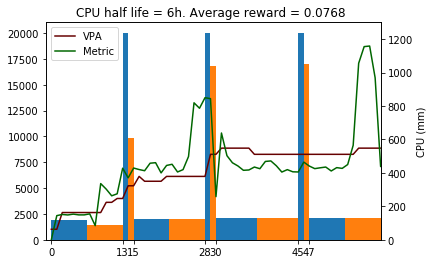

In [32]:
x_range = [0,13,15,28,30,45,47]

x_range = [0,13,15,28,30,45,47]
x_range2 = [6.5,14,21.5,29,37.5,46,53.5]
w = [6.5,1,6.5,1,7.5,1,6.5]
plt.bar(x_range, rps,width=w, align="edge")
plt.bar(x_range2, throughput, width=w, align="edge")

plt.xticks(x_range)
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,1300)

plt.legend()
plt.title("CPU half life = 6h. Average reward = %.4f "%avg_r)
plt.show()

In [13]:
# cpu_half_life = 6h
version = "15m-bursty"
experiment_type = "nginx"
version_folder = os.path.join(result_folder, experiment_type + "-" + version)
replicas = 2


throughput = [ 1507.04, 6977.62, 1881.68, 16429.76, 1664.99, 16922.47, 1956.63] 
rps = [2127,19992,1885,20032,1666,20005,1959]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-15m-bursty-20220413045952.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-15m-bursty-20220413045952.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

In [14]:
r = 0
for i,j in zip(rps, throughput):
    r+= (i-j)/i
    print((i-j)/i)

r/4

0.29147155618241655
0.6509793917567027
0.001761273209549038
0.17982428115015983
0.000606242496998794
0.15408797800549856
0.0012098009188360852


0.3199851309300404

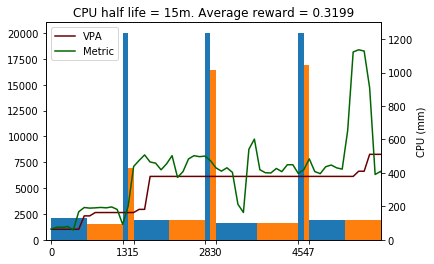

In [16]:
x_range = [0,13,15,28,30,45,47]
x_range2 = [6.5,14,21.5,29,37.5,46,53.5]
w = [6.5,1,6.5,1,7.5,1,6.5]
plt.bar(x_range, rps,width=w, align="edge")
plt.bar(x_range2, throughput, width=w, align="edge")


plt.xticks(x_range)
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,1300)

plt.legend()
plt.title("CPU half life = 15m. Average reward = 0.3199")
plt.show()

0.229407598197038
0.6502060412082417
0.005290446471435421
0.20401079676097172
0.0006208791208791809
0.17618579344082258
0.0005310573731625845


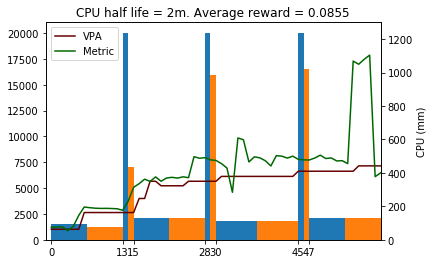

In [27]:
# cpu_half_life = 6h
version = "2m-bursty"
experiment_type = "nginx"
version_folder = os.path.join(result_folder, experiment_type + "-" + version)
replicas = 2


throughput = [  1196.73, 6994.48, 2071.98, 15924.56, 1818.87, 16503.47, 2107.88] 
rps = [1553,19996,2083,20006,1820,20033,2109]
duration = [13,2,13,2,15,2,13]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-2m-bursty-20220413171051.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-2m-bursty-20220413171051.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

r = 0
for i,j,k in zip(rps, throughput, duration):
    r+= (k * (i-j))/i
    print((i-j)/i)

avg_r = r/sum(duration)

x_range = [0,13,15,28,30,45,47]
x_range2 = [6.5,14,21.5,29,37.5,46,53.5]
w = [6.5,1,6.5,1,7.5,1,6.5]
plt.bar(x_range, rps,width=w, align="edge")
plt.bar(x_range2, throughput, width=w, align="edge")

plt.xticks(x_range)
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,1300)

plt.legend()
plt.title("CPU half life = 2m. Average reward = %.4f"%avg_r)
plt.show()

0.3579878357830714
0.6463709959522262
0.0044751381215470025
0.10273059406436114
4.9652432969170335e-05
0.11899559823929567
0.00011398963730571362


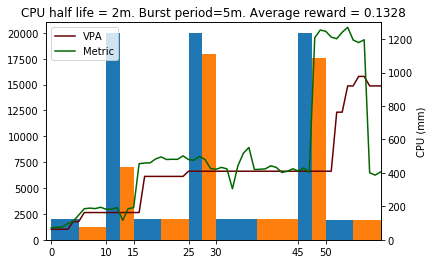

In [29]:
# cpu_half_life = 6h
version = "2m-bursty-5mbursts"
experiment_type = "nginx"
version_folder = os.path.join(result_folder, experiment_type + "-" + version)
replicas = 2


throughput = [   1266.69, 7076.47, 1982.09, 17928.34, 2013.90, 17613.04, 1929.78] 
rps = [1973,20011,1991,19981,2014,19992,1930]
duration = [10,5,10,5,15,5,10]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-2m-bursty-5mbursts-20220415173722.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-2m-bursty-5mbursts-20220415173722.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

r = 0
for i,j,k in zip(rps, throughput, duration):
    r+= (k * (i-j))/i
    print((i-j)/i)

avg_r = r/sum(duration)

x_range = [0,10,15,25,30,45,50]
x_range2 = [5,12.5,20,27.5,37.5,47.5,55]
w = [5,2.5,5,2.5,7.5,2.5,5]
plt.bar(x_range, rps,width=w, align="edge")
plt.bar(x_range2, throughput, width=w, align="edge")

plt.xticks(x_range)
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,1300)

plt.legend()
plt.title("CPU half life = 2m. Burst period=5m. Average reward = %.4f"%avg_r)
plt.show()

[2143, 2033, 2070]
average reward  -0.3124274493933036
[0, 15, 30, 45]
[7.5, 22.5, 37.5, 52.5]


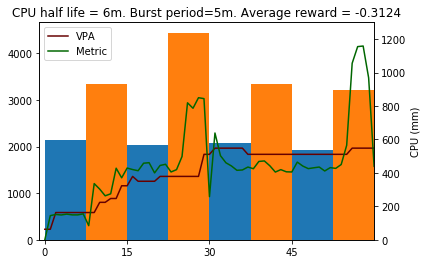

In [71]:
replicas = 2
def plot(version, experiment_type, half_life, experiment_duration=60):
    version_folder = os.path.join(result_folder, experiment_type + "-" + version)
    with open(version_folder + "/workload_details.txt") as f:
        rps = list(map(int,f.readline().rstrip().split(',')))
        per_rps_duration = list(map(int, f.readline().rstrip().split(',')))
    
    p_object = subprocess.run("grep Requests %s/* | awk '{print $2}'"%version_folder, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    actual_rps = list([int(i.split('.')[0]) for i in p_object.stdout.decode("ascii").split()])
    print(actual_rps)

    vpa_values  = []
    with open(version_folder + "/cpu-nginx-vpa-%s.log"%version) as f:
        for line in f:
            vpa_values.append(int(line[:-2]))
    vpa_values_exp_window = vpa_values[:experiment_duration*2] # collected every 30s.

    cpu_values = []
    with open(version_folder + "/metrics-nginx-deployment-%s.log"%version) as f:
        for cont1, cont2 in zip(f,f):
            cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
    cpu_values_exp_window = cpu_values[:experiment_duration*2]


    r = 0
    for i,j,k in zip(rps, throughput, duration):
        r+= (k * (i-j))/i
    avg_r = r/sum(duration)
    print("average reward ",avg_r)

    x_range1 = [0] # start of the first bar graph/
    x_range2 = []
    w = []
    per_rps_duration_m = list([i//60 for i in per_rps_duration])
    for i, value in enumerate(per_rps_duration_m[:-1]):
        x_range1.append(x_range1[i] + value)
        w.append(value/2)
    w.append((experiment_duration - x_range1[-1])/2 )
    for i, value in enumerate(w):
        x_range2.append(x_range1[i]+w[i])
    
    print(x_range1)
    print(x_range2)
    
    plt.bar(x_range1, rps,width=w, align="edge")
    plt.bar(x_range2, throughput, width=w, align="edge")
    plt.xticks(x_range1)
    plt.xlim(-1,experiment_duration)
    
    axes2 = plt.twinx()
    axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
    axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
    axes2.set_ylabel('CPU (mm)')
    axes2.set_ylim(0,1300)
    plt.legend()
    plt.title("CPU half life = %dm. Average reward = %.4f"%(half_life, avg_r))
    plt.show()
plot("6h-high-mean", "nginx", 6)

In [ ]:
throughput = [   1266.69, 7076.47, 1982.09, 17928.34, 2013.90, 17613.04, 1929.78] 
rps = [1973,20011,1991,19981,2014,19992,1930]
duration = [10,5,10,5,15,5,10]

vpa_values  = []
with open(version_folder + "/cpu-nginx-vpa-2m-bursty-5mbursts-20220415173722.log") as f:
    for line in f:
        vpa_values.append(int(line[:-2]))
vpa_values_1hour = vpa_values[:120]

cpu_values = []
with open(version_folder + "/metrics-nginx-deployment-2m-bursty-5mbursts-20220415173722.log") as f:
    for cont1, cont2 in zip(f,f):
        cpu_values.append((int(cont1[:-2])+int(cont2[:-2])/2))
cpu_values_1hour = cpu_values[:120]

r = 0
for i,j,k in zip(rps, throughput, duration):
    r+= (k * (i-j))/i
    print((i-j)/i)

avg_r = r/sum(duration)

x_range = [0,10,15,25,30,45,50]
x_range2 = [5,12.5,20,27.5,37.5,47.5,55]
w = [5,2.5,5,2.5,7.5,2.5,5]
plt.bar(x_range, rps,width=w, align="edge")
plt.bar(x_range2, throughput, width=w, align="edge")

plt.xticks(x_range)
plt.xlim(-1,60)

axes2 = plt.twinx()
axes2.plot(vpa_values_1hour, color=(0.4,0.0,0.0), label='VPA')
axes2.plot(cpu_values_1hour, color= (0.0,0.4,0.0), label="Metric")
axes2.set_ylabel('CPU (mm)')
axes2.set_ylim(0,1300)

plt.legend()
plt.title("CPU half life = 2m. Burst period=5m. Average reward = %.4f"%avg_r)
plt.show()